In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [2]:
turistas = pd.read_csv('df_variaciones.csv')
turistas = turistas.rename(columns={'periodo': 'Fecha'})
turistas['Fecha'] = pd.to_datetime(turistas['Fecha'])
turistas.set_index('Fecha', inplace=True)
turistas = turistas['Turistas_var']
train = turistas[:'2019-02-01']
test = turistas['2019-03-01':]

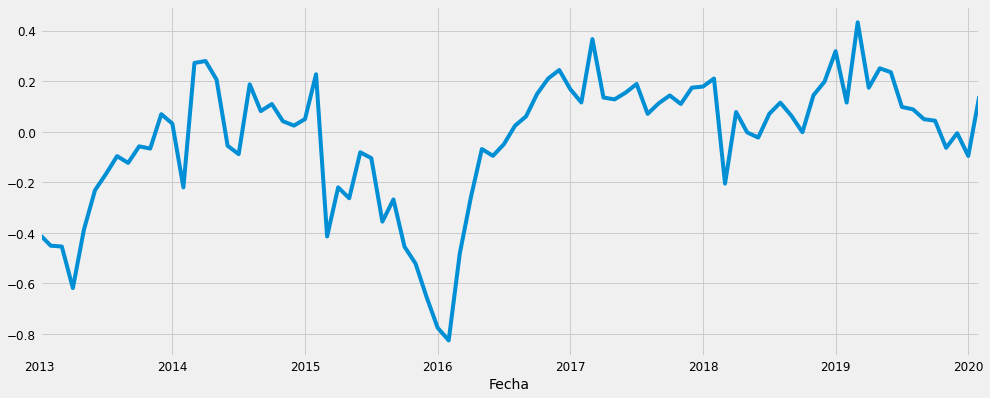

In [27]:
turistas.plot(figsize=(15, 6))
plt.show()

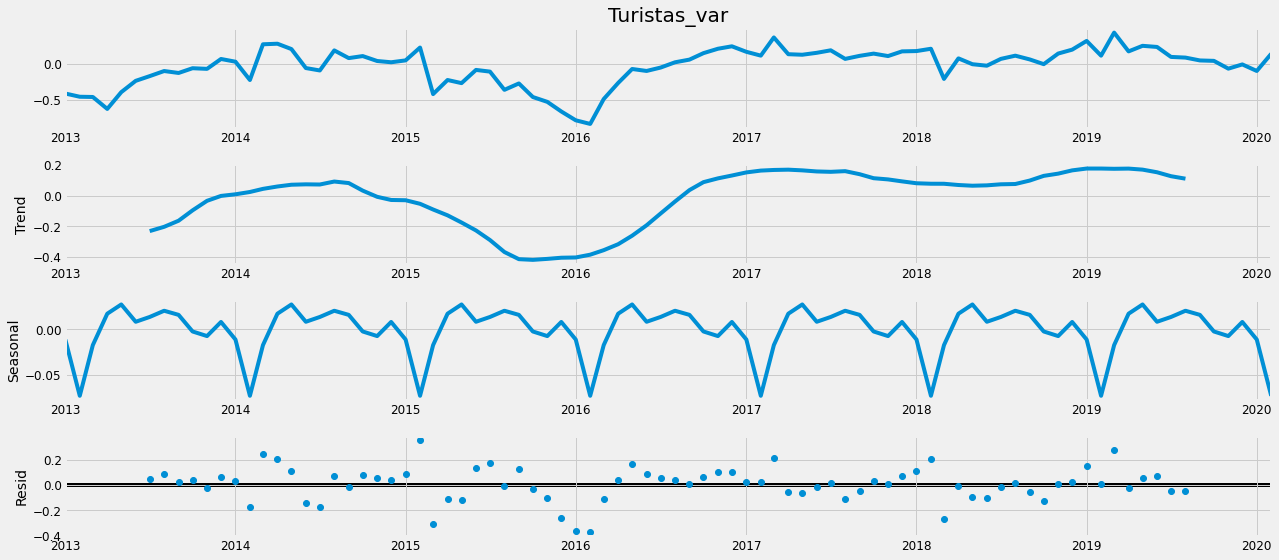

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(turistas, model='additive' )
fig = decomposition.plot()
plt.show()

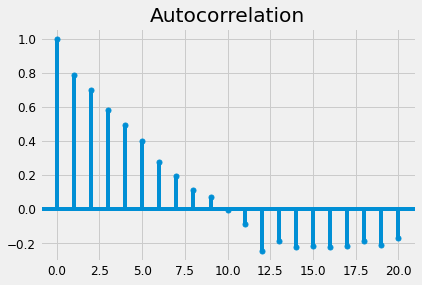

In [14]:
pm.plot_acf(turistas)

In [12]:
stepwise_model = auto_arima(train, start_p=0, start_q=0,
                           max_p=5, max_q=5, max_d = 5, m=12,
                           start_P=0, start_Q = 0, max_P = 5, 
                           max_D = 5, max_Q = 5, seasonal=True,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-51.283, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-71.654, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-77.412, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-53.148, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-54.805, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-76.364, Time=0.17 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-77.293, Time=0.40 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-71.184, Time=0.10 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-76.158, Time=0.78 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-76.981, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-75.417, Time=0.17 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-77.398, Time=0.19 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-76.390, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12]             

In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
best_aic = 3000
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal

/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/juanjo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py

In [31]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=stepwise_model.order,
                                seasonal_order=stepwise_model.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                            Turistas_var   No. Observations:                   74
Model:             SARIMAX(1, 1, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -1095.320
Date:                                 Fri, 16 Oct 2020   AIC                           2198.640
Time:                                         14:40:27   BIC                           2206.125
Sample:                                     01-01-2013   HQIC                          2201.468
                                          - 02-01-2019                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2542         -0        inf      0.000      -0.254      -0

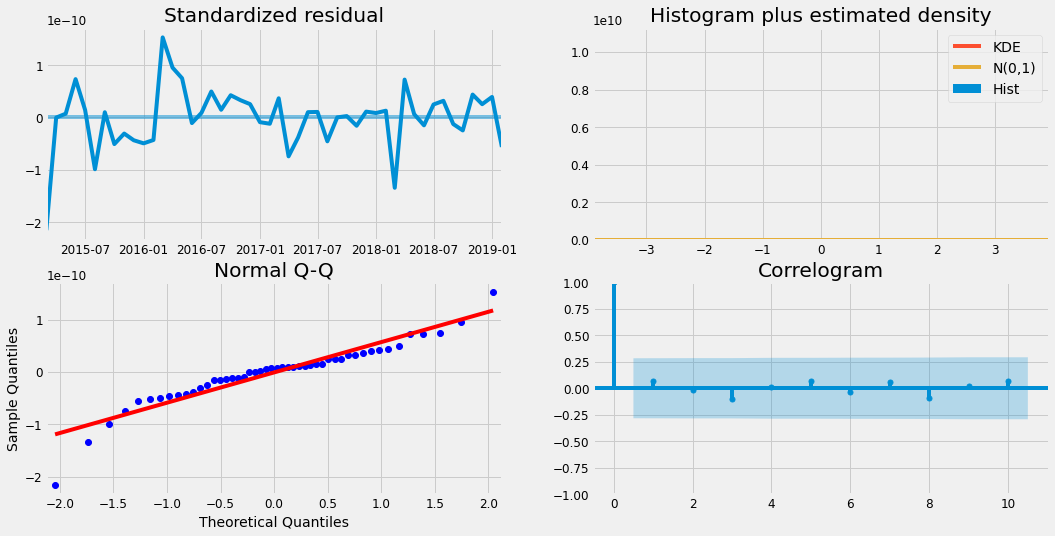

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

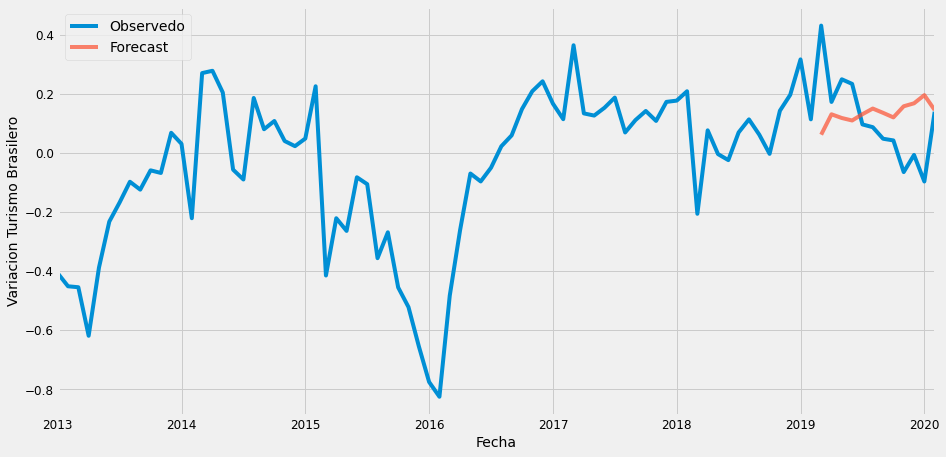

In [83]:
pred = results.forecast(steps = 12)
pred_ci = results.get_forecast(steps = 12).summary_frame()[['mean_ci_lower', 'mean_ci_upper']]
ax = turistas['2012':].plot(label='Observedo')
pred.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Fecha')
ax.set_ylabel('Variacion Turismo Brasilero')
plt.legend()
plt.show()

In [81]:
mse = mean_squared_error(test, pred)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.02967
